# Final Model

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Load and Preprocess MNIST Dataset

In [2]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

# Normalize MNIST images
X_train_mnist, X_test_mnist = X_train_mnist / 255.0, X_test_mnist / 255.0

# Reshape for CNN
X_train_mnist = X_train_mnist.reshape(-1, 28, 28, 1)
X_test_mnist = X_test_mnist.reshape(-1, 28, 28, 1)

## Load and Preprocess Operator Dataset

In [3]:
operator_base_path = "operatorDataset"
operator_labels = ["add", "subtract", "multiply", "divide"]
operator_to_label = {op: i+10 for i, op in enumerate(operator_labels)}  

def load_operator_dataset(split):
    images = []
    labels = []
    folder_path = os.path.join(operator_base_path, split)

    for label in operator_labels:
        class_path = os.path.join(folder_path, label)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28)) / 255.0  # Normalize
            images.append(img.reshape(28, 28, 1))
            labels.append(operator_to_label[label])

    return np.array(images), np.array(labels)

X_train_op, y_train_op = load_operator_dataset("train")
X_test_op, y_test_op = load_operator_dataset("test")

## Combine Dataset

In [4]:
X_train = np.concatenate((X_train_mnist, X_train_op), axis=0)
y_train = np.concatenate((y_train_mnist, y_train_op), axis=0)

X_test = np.concatenate((X_test_mnist, X_test_op), axis=0)
y_test = np.concatenate((y_test_mnist, y_test_op), axis=0)

y_train = to_categorical(y_train, num_classes=14)
y_test = to_categorical(y_test, num_classes=14)


## CNN Model

In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3), 
    Dense(64, activation='relu'),
    Dropout(0.3), 
    Dense(14, activation='softmax')
])

D:\Sem - 6\Minor 2\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [7]:
history = model.fit(X_train, y_train, epochs=8, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/8
2276/2276 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - accuracy: 0.8232 - loss: 0.5619 - val_accuracy: 0.9862 - val_loss: 0.0423
Epoch 2/8
2276/2276 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.9750 - loss: 0.0900 - val_accuracy: 0.9891 - val_loss: 0.0345
Epoch 3/8
2276/2276 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.9816 - loss: 0.0629 - val_accuracy: 0.9890 - val_loss: 0.0350
Epoch 4/8
2276/2276 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.9862 - loss: 0.0476 - val_accuracy: 0.9918 - val_loss: 0.0301
Epoch 5/8
2276/2276 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 0.9882 - loss: 0.0405 - val_accuracy: 0.9920 - val_loss: 0.0295
Epoch 6/8
2276/2276 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 0.9898 - loss: 0.0348 - val_accuracy: 0.9928 - val_loss: 0.0247
Epoch 7/8
2276/2276 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 0.9907 - loss: 0.0320 - val_accuracy: 0.9919 - val_loss: 0.0297
Epoch 8/8
2276/2276 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.9917 - loss: 0

## Model Performance

In [8]:
test_loss, test_acc = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9909 - loss: 0.0309

Test Accuracy: 99.28%


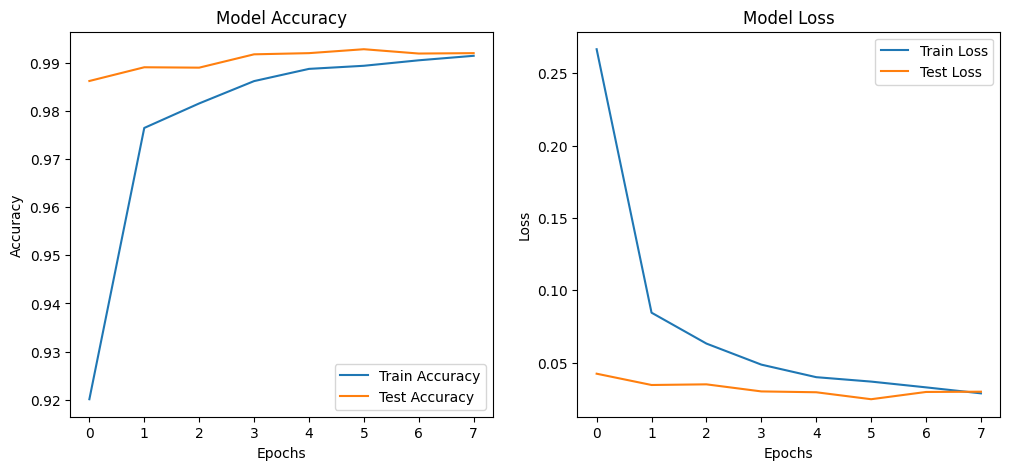

384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009
         add       0.99      0.99      0.99       533
    subtract       1.00      1.00      1.00       648
    multiply       0.99      0.99      0.99       593
      divide       0.99      1.00      1.00       494

    accuracy                           0.99     12268
   macro avg       0.99      0.99      0.99     12268
weighted avg   

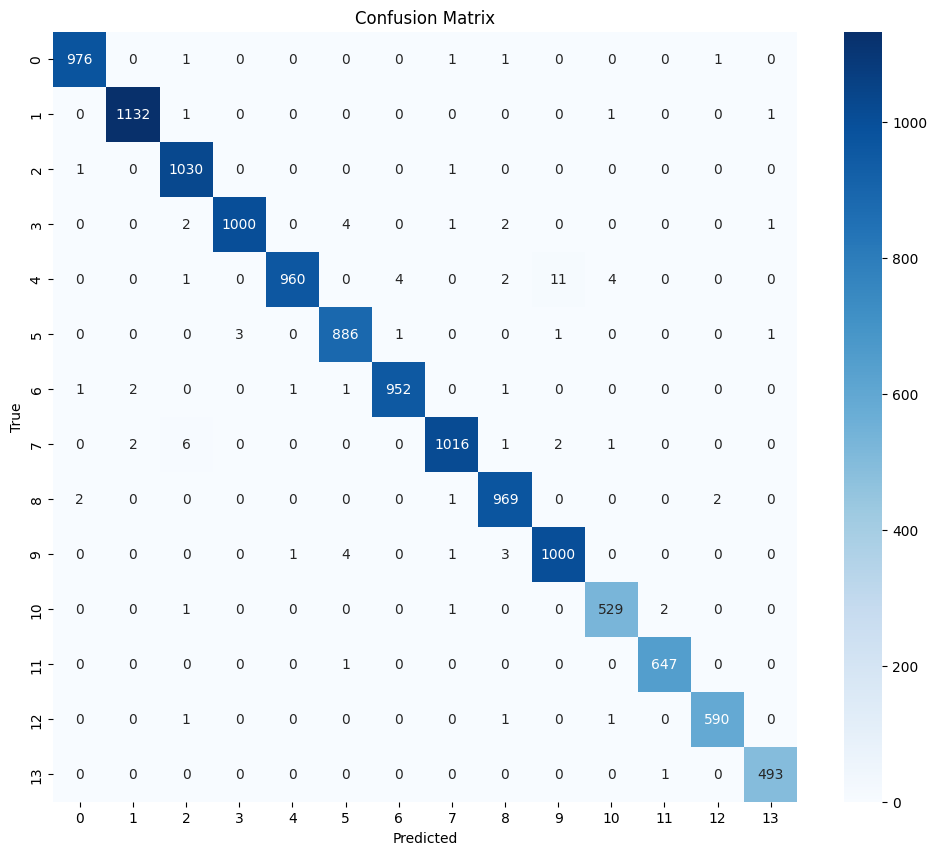

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(10)] + operator_labels))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [10]:
model.save("basic_model.h5")

## Real Time Testing 

In [2]:
import cvzone
import cv2
import numpy as np
from cvzone.HandTrackingModule import HandDetector
from tensorflow.keras.models import load_model

# Load your trained model
model_path = "basic_model.h5"
model = load_model(model_path)

# Initialize webcam
cap = cv2.VideoCapture(0)

# Hand detector
detector = HandDetector(staticMode=False, maxHands=1, modelComplexity=1, detectionCon=0.5, minTrackCon=0.5)

def getHandInfo(img):
    hands, img = detector.findHands(img, draw=True, flipType=True)
    if hands:
        hand = hands[0]  
        lmList = hand["lmList"] 
        fingers = detector.fingersUp(hand)
        return fingers, lmList
    return None

def draw(info, prev_pos, canvas):
    fingers, lmList = info
    current_pos = None 
    if fingers == [0, 1, 0, 0, 0]:  
        current_pos = lmList[8][0:2] 
        if prev_pos is None: 
            prev_pos = current_pos
        cv2.line(canvas, tuple(current_pos), tuple(prev_pos), (255, 255, 255), 10)  
    return current_pos, canvas

# Merge close contours to detect the divide sign correctly
def merge_close_contours(contours, threshold=50):
    merged_contours = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        merged = False
        for i, (mx, my, mw, mh) in enumerate(merged_contours):
            # If contours are close, merge them
            if abs(x - mx) < threshold and abs(y - my) < threshold:
                merged_contours[i] = (
                    min(x, mx), min(y, my), 
                    max(x+w, mx+mw) - min(x, mx), 
                    max(y+h, my+mh) - min(y, my)
                )
                merged = True
                break
        if not merged:
            merged_contours.append((x, y, w, h))
    return merged_contours

def preprocess_for_prediction(canvas):
    gray_canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray_canvas, 50, 255, cv2.THRESH_BINARY)

    # Apply morphological operations to reduce noise
    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.dilate(binary, kernel, iterations=1)
    
    # Find contours and merge if necessary
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

    merged_contours = merge_close_contours(contours)

    segmented_images = []
    prev_x = -50

    for x, y, w, h in merged_contours:
        if w > 10 and h > 10:  # Filter small noises
            if x - prev_x > 50:  # Large gap indicates a new number/operator
                segmented_images.append(" ")

            cropped = binary[y:y+h, x:x+w]

            # Aspect ratio adjustment
            aspect_ratio = w / h
            if aspect_ratio > 1:
                new_w = 20
                new_h = int(20 / aspect_ratio)
            else:
                new_h = 20
                new_w = int(20 * aspect_ratio)

            resized = cv2.resize(cropped, (new_w, new_h), interpolation=cv2.INTER_AREA)

            # Center the digit in a 28x28 blank image
            final_img = np.zeros((28, 28), dtype=np.uint8)
            x_offset = (28 - new_w) // 2
            y_offset = (28 - new_h) // 2
            final_img[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized

            # Normalize and reshape for model input
            final_img = final_img / 255.0
            final_img = final_img.reshape(1, 28, 28, 1)

            # Display each segmented image
            cv2.imshow(f"Segmented {x}", resized)

            segmented_images.append((final_img, (x, y, w, h)))
            prev_x = x + w

    return segmented_images

def evaluate_expression(expression):
    try:
        result = str(eval(expression))
        return f"{expression} = {result}"
    except Exception:
        return "Invalid Expression"

prev_pos = None
canvas = None
predicted_expression = ""
display_text = ""

while True:
    success, img = cap.read()
    img = cv2.flip(img, 1)  
    
    if canvas is None:
        canvas = np.zeros_like(img)
    
    info = getHandInfo(img)
    if info:
        fingers, lmList = info
        
        # Clear canvas when all 5 fingers are up
        if fingers == [1, 1, 1, 1, 1]:  
            canvas = np.zeros_like(img)
            prev_pos = None
            predicted_expression = ""
            display_text = ""
            print("Canvas Cleared (All 5 Fingers Up)")

        # Predict digit and evaluate expression when 2nd & 5th fingers are up
        if fingers == [0, 1, 0, 0, 1]:
            segmented_images = preprocess_for_prediction(canvas)
            expression = ""
            for i, item in enumerate(segmented_images):
                if item == " ":
                    expression += " "
                    continue
                processed_img, (x, y, w, h) = item
                prediction = model.predict(processed_img)
                predicted_class = np.argmax(prediction)

                # Class-specific predictions
                if predicted_class >= 0 and predicted_class <= 9:
                    expression += str(predicted_class)
                elif predicted_class == 10:
                    expression += "+"
                elif predicted_class == 11:
                    expression += "-"
                elif predicted_class == 12:
                    expression += "*"
                elif predicted_class == 13:
                    expression += "/"
            expression = expression.replace(" ", "")
            display_text = evaluate_expression(expression)
            print(f"Expression: {display_text}")

        prev_pos, canvas = draw(info, prev_pos, canvas)

    image_combined = cv2.addWeighted(img, 0.7, canvas, 0.3, 0)

    if display_text:
        cv2.putText(image_combined, f'{display_text}', 
                    (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 3)
    
    cv2.imshow("Canvas", canvas)
    cv2.imshow("Real-Time Prediction", image_combined)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared

### Alternative approach

In [2]:
import cvzone
import cv2
import numpy as np
from cvzone.HandTrackingModule import HandDetector
from tensorflow.keras.models import load_model
import time

# Load your trained model
model_path = "basic_model.h5"
model = load_model(model_path)

# Initialize webcam
cap = cv2.VideoCapture(0)

# Hand detector
detector = HandDetector(staticMode=False, maxHands=1, modelComplexity=1, detectionCon=0.5, minTrackCon=0.5)

def getHandInfo(img):
    hands, img = detector.findHands(img, draw=True, flipType=True)
    if hands:
        hand = hands[0]
        lmList = hand["lmList"]
        fingers = detector.fingersUp(hand)
        return fingers, lmList
    return None

def draw(info, prev_pos, canvas):
    fingers, lmList = info
    current_pos = None
    if fingers == [0, 1, 0, 0, 0]:
        current_pos = lmList[8][0:2]
        if prev_pos is None:
            prev_pos = current_pos
        cv2.line(canvas, tuple(current_pos), tuple(prev_pos), (255, 255, 255), 10)
    return current_pos, canvas

def resize_and_center(img, target_size=(28, 28)):
    h, w = img.shape[:2]
    if w == 0 or h == 0:
        return np.zeros(target_size, dtype=np.uint8)
    aspect = w / h
    tw, th = target_size
    if aspect > 1:
        new_w = tw
        new_h = int(tw / aspect)
    else:
        new_h = th
        new_w = int(th * aspect)
    resized_img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)
    delta_w = tw - new_w
    delta_h = th - new_h
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    color = [0, 0, 0]
    final_img = cv2.copyMakeBorder(resized_img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    return final_img

def preprocess_for_prediction(canvas):
    gray_canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray_canvas, 50, 255, cv2.THRESH_BINARY)
    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.dilate(binary, kernel, iterations=1)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

    segmented_images = []
    prev_x_end = -30  # Adjusted gap threshold for double digits

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w > 5 and h > 10:
            if x - prev_x_end > 20:  # Further adjusted gap
                segmented_images.append(" ")
            cropped = binary[y:y+h, x:x+w]
            resized = resize_and_center(cropped)
            normalized_img = resized / 255.0
            final_img = normalized_img.reshape(1, 28, 28, 1)
            cv2.imshow(f"Segmented {x}", resized)
            segmented_images.append((final_img, (x, y, w, h)))
            prev_x_end = x + w
    return segmented_images

def preprocess_for_division(canvas):
    gray_canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray_canvas, 50, 255, cv2.THRESH_BINARY)
    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.dilate(binary, kernel, iterations=1)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    potential_dots = []
    potential_lines = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / h
        if 2 < w < 15 and 2 < h < 15 and 0.7 < aspect_ratio < 1.3:
            potential_dots.append(((x, y, w, h), cnt))
        elif 10 < w < 30 and 2 < h < 8 and aspect_ratio > 1.5:
            potential_lines.append(((x, y, w, h), cnt))
    return potential_dots, potential_lines

def detect_division_symbol(dots, lines, threshold_dist_dots=15, threshold_dist_line=10, threshold_align=10):
    if len(dots) >= 2 and len(lines) >= 1:
        # Find the line closest to the vertical center of the two closest dots
        dots_sorted_y = sorted(dots, key=lambda item: item[0][1])
        dot1_rect, _ = dots_sorted_y[0]
        dot2_rect, _ = dots_sorted_y[1]
        mid_y = (dot1_rect[1] + dot1_rect[3] // 2 + dot2_rect[1] + dot2_rect[3] // 2) // 2

        best_line = None
        min_dist_y = float('inf')

        for line_rect, _ in lines:
            line_cy = line_rect[1] + line_rect[3] // 2
            dist_y = abs(line_cy - mid_y)
            if dist_y < min_dist_y:
                min_dist_y = dist_y
                best_line = line_rect

        if best_line:
            dot1_cx = dot1_rect[0] + dot1_rect[2] // 2
            dot2_cx = dot2_rect[0] + dot2_rect[2] // 2
            line_cx = best_line[0] + best_line[2] // 2

            if abs(dot1_cx - line_cx) < threshold_align and abs(dot2_cx - line_cx) < threshold_align and \
               abs(dot1_rect[1] - best_line[1]) > threshold_dist_line / 2 and \
               abs(dot2_rect[1] - best_line[1]) > threshold_dist_line / 2 and \
               abs(dot1_rect[1] - dot2_rect[1]) > threshold_dist_dots:
                return True
    return False

def evaluate_expression(expression):
    try:
        result = str(eval(expression))
        return f"{expression} = {result}"
    except Exception:
        return "Invalid Expression"

prev_pos = None
canvas = None
predicted_expression = ""
display_text = ""
last_prediction_time = 0
prediction_interval = 1 # seconds

while True:
    success, img = cap.read()
    img = cv2.flip(img, 1)

    if canvas is None:
        canvas = np.zeros_like(img)

    info = getHandInfo(img)
    if info:
        fingers, lmList = info

        if fingers == [1, 1, 1, 1, 1]:
            canvas = np.zeros_like(img)
            prev_pos = None
            predicted_expression = ""
            display_text = ""
            print("Canvas Cleared (All 5 Fingers Up)")

        if fingers == [0, 1, 0, 0, 1] and time.time() - last_prediction_time > prediction_interval:
            potential_dots, potential_lines = preprocess_for_division(canvas)
            is_division = detect_division_symbol(potential_dots, potential_lines)
            current_expression_parts = []

            if is_division:
                current_expression_parts.append("/")
                # Optionally clear the division symbol area on the canvas
            else:
                segmented_images = preprocess_for_prediction(canvas)
                for item in segmented_images:
                    if item == " ":
                        current_expression_parts.append(" ")
                        continue
                    processed_img, _ = item
                    prediction = model.predict(processed_img)
                    predicted_class = np.argmax(prediction)
                    if 0 <= predicted_class <= 9:
                        current_expression_parts.append(str(predicted_class))
                    elif predicted_class == 10:
                        current_expression_parts.append("+")
                    elif predicted_class == 11:
                        current_expression_parts.append("-")
                    elif predicted_class == 12:
                        current_expression_parts.append("*")
                    elif predicted_class == 13:
                        current_expression_parts.append("/") # Assuming your model has '/' at index 13

            expression_str = "".join(current_expression_parts).replace(" ", "")
            if expression_str:
                display_text = evaluate_expression(expression_str)
                print(f"Expression: {display_text}")
                last_prediction_time = time.time()

        prev_pos, canvas = draw(info, prev_pos, canvas)

    image_combined = cv2.addWeighted(img, 0.7, canvas, 0.3, 0)

    if display_text:
        cv2.putText(image_combined, f'{display_text}',
                    (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 3)

    cv2.imshow("Canvas", canvas)
    cv2.imshow("Real-Time Prediction", image_combined)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Expression: 40-12 = 28


## Final

In [6]:
import cvzone
import cv2
import numpy as np
from cvzone.HandTrackingModule import HandDetector
from tensorflow.keras.models import load_model
import time

# Load your trained model
model_path = "basic_model.h5"
model = load_model(model_path)

# Initialize webcam
cap = cv2.VideoCapture(0)

# Hand detector
detector = HandDetector(staticMode=False, maxHands=1, modelComplexity=1, detectionCon=0.5, minTrackCon=0.5)

def getHandInfo(img):
    hands, img = detector.findHands(img, draw=True, flipType=True)
    if hands:
        hand = hands[0]
        lmList = hand["lmList"]
        fingers = detector.fingersUp(hand)
        return fingers, lmList
    return None

def draw(info, prev_pos, canvas):
    fingers, lmList = info
    current_pos = None
    if fingers == [0, 1, 0, 0, 0]:
        current_pos = lmList[8][0:2]
        if prev_pos is None:
            prev_pos = current_pos
        cv2.line(canvas, tuple(current_pos), tuple(prev_pos), (255, 255, 255), 10)
    return current_pos, canvas

def resize_and_center(img, target_size=(28, 28)):
    h, w = img.shape[:2]
    if w == 0 or h == 0:
        return np.zeros(target_size, dtype=np.uint8)
    aspect = w / h
    tw, th = target_size
    if aspect > 1:
        new_w = tw
        new_h = int(tw / aspect)
    else:
        new_h = th
        new_w = int(th * aspect)
    resized_img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)
    delta_w = tw - new_w
    delta_h = th - new_h
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    color = [0, 0, 0]
    final_img = cv2.copyMakeBorder(resized_img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    return final_img

def preprocess_for_prediction(canvas):
    gray_canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray_canvas, 50, 255, cv2.THRESH_BINARY)
    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.dilate(binary, kernel, iterations=1)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

    segmented_images = []
    prev_x_end = -30  # Adjusted gap threshold for double digits

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w > 5 and h > 10:
            if x - prev_x_end > 20:  # Further adjusted gap
                segmented_images.append(" ")
            cropped = binary[y:y+h, x:x+w]
            resized = resize_and_center(cropped)
            normalized_img = resized / 255.0
            final_img = normalized_img.reshape(1, 28, 28, 1)
            cv2.imshow(f"Segmented {x}", resized)
            segmented_images.append((final_img, (x, y, w, h)))
            prev_x_end = x + w
    return segmented_images

def preprocess_for_division(canvas):
    gray_canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray_canvas, 50, 255, cv2.THRESH_BINARY)
    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.dilate(binary, kernel, iterations=1)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    potential_dots = []
    potential_lines = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / h
        if 2 < w < 15 and 2 < h < 15 and 0.7 < aspect_ratio < 1.3:
            potential_dots.append(((x, y, w, h), cnt))
        elif 10 < w < 30 and 2 < h < 8 and aspect_ratio > 1.5:
            potential_lines.append(((x, y, w, h), cnt))
    return potential_dots, potential_lines

def detect_division_symbol(dots, lines, threshold_dist_dots=15, threshold_dist_line=10, threshold_align=10):
    if len(dots) >= 2 and len(lines) >= 1:
        dots_sorted_y = sorted(dots, key=lambda item: item[0][1])
        dot1_rect, _ = dots_sorted_y[0]
        dot2_rect, _ = dots_sorted_y[1]
        mid_y = (dot1_rect[1] + dot1_rect[3] // 2 + dot2_rect[1] + dot2_rect[3] // 2) // 2

        best_line = None
        min_dist_y = float('inf')

        for line_rect, _ in lines:
            line_cy = line_rect[1] + line_rect[3] // 2
            dist_y = abs(line_cy - mid_y)
            if dist_y < min_dist_y:
                min_dist_y = dist_y
                best_line = line_rect

        if best_line:
            dot1_cx = dot1_rect[0] + dot1_rect[2] // 2
            dot2_cx = dot2_rect[0] + dot2_rect[2] // 2
            line_cx = best_line[0] + best_line[2] // 2

            if abs(dot1_cx - line_cx) < threshold_align and abs(dot2_cx - line_cx) < threshold_align and \
               abs(dot1_rect[1] - best_line[1]) > threshold_dist_line / 2 and \
               abs(dot2_rect[1] - best_line[1]) > threshold_dist_line / 2 and \
               abs(dot1_rect[1] - dot2_rect[1]) > threshold_dist_dots:
                return True
    return False

def evaluate_expression(expression):
    try:
        result = str(eval(expression))
        return f"{expression} = {result}"
    except Exception:
        return "Invalid Expression"

prev_pos = None
canvas = None
predicted_expression = ""
display_text = ""
last_prediction_time = 0
prediction_interval = 1  # seconds

while True:
    success, img = cap.read()
    img = cv2.flip(img, 1)

    if canvas is None:
        canvas = np.zeros_like(img)

    info = getHandInfo(img)
    if info:
        fingers, lmList = info

        if fingers == [1, 1, 1, 1, 1]:
            canvas = np.zeros_like(img)
            prev_pos = None
            predicted_expression = ""
            display_text = ""
            print("Canvas Cleared (All 5 Fingers Up)")

        if fingers == [0, 1, 0, 0, 1] and time.time() - last_prediction_time > prediction_interval:
            potential_dots, potential_lines = preprocess_for_division(canvas)
            is_division = detect_division_symbol(potential_dots, potential_lines)
            current_expression_parts = []

            if is_division:
                current_expression_parts.append("/")
            else:
                segmented_images = preprocess_for_prediction(canvas)
                for item in segmented_images:
                    if item == " ":
                        current_expression_parts.append(" ")
                        continue
                    processed_img, _ = item
                    prediction = model.predict(processed_img)
                    predicted_class = np.argmax(prediction)
                    if 0 <= predicted_class <= 9:
                        current_expression_parts.append(str(predicted_class))
                    elif predicted_class == 10:
                        current_expression_parts.append("+")
                    elif predicted_class == 11:
                        current_expression_parts.append("-")
                    elif predicted_class == 12:
                        current_expression_parts.append("*")
                    elif predicted_class == 13:
                        current_expression_parts.append("/")  # If model includes division

            # Merge digits to form multi-digit numbers if no operator in between
            merged_expression = []
            buffer = ""

            for part in current_expression_parts:
                if part.isdigit():
                    buffer += part
                else:
                    if buffer:
                        merged_expression.append(buffer)
                        buffer = ""
                    merged_expression.append(part)
            if buffer:
                merged_expression.append(buffer)

            expression_str = "".join(merged_expression)
            if expression_str:
                display_text = evaluate_expression(expression_str)
                print(f"Expression: {display_text}")
                last_prediction_time = time.time()

        prev_pos, canvas = draw(info, prev_pos, canvas)

    image_combined = cv2.addWeighted(img, 0.7, canvas, 0.3, 0)

    if display_text:
        cv2.putText(image_combined, f'{display_text}',
                    (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 3)

    cv2.imshow("Canvas", canvas)
    cv2.imshow("Real-Time Prediction", image_combined)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared (All 5 Fingers Up)
Canvas Cleared